In [1]:
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

#Libraries imported
# importing file

In [2]:
df=pd.read_csv("C:/Users/LZ575NE/OneDrive - EY/Desktop/pyprograms/Insurance/Cross sell health insurance prediction/train.csv")

In [3]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [4]:
df.shape

(381109, 12)

In [6]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [7]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

# Total Response count

In [8]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [9]:
## data performance

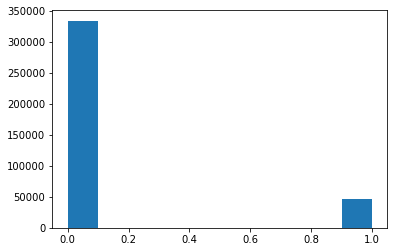

In [10]:
x=df['Response']

plt.hist(x)
plt.show()

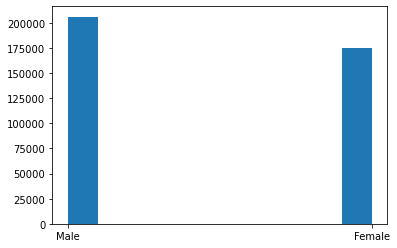

Male      206089
Female    175020
Name: Gender, dtype: int64


In [11]:
x=df['Gender']

plt.hist(x)
plt.show()

print(df['Gender'].value_counts())

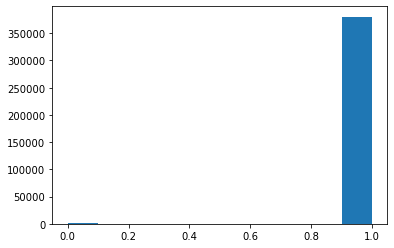

1    380297
0       812
Name: Driving_License, dtype: int64


In [12]:
x=df['Driving_License']

plt.hist(x)
plt.show()

print(df['Driving_License'].value_counts())

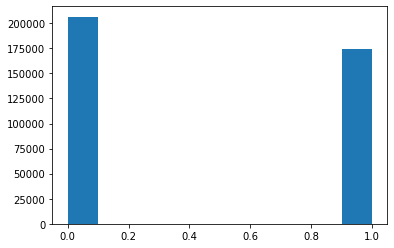

0    206481
1    174628
Name: Previously_Insured, dtype: int64


In [13]:
 x=df['Previously_Insured']

plt.hist(x)
plt.show()

print(df['Previously_Insured'].value_counts())

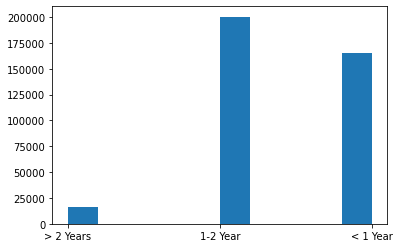

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


In [14]:
x=df['Vehicle_Age']

plt.hist(x)
plt.show()

print(df['Vehicle_Age'].value_counts())

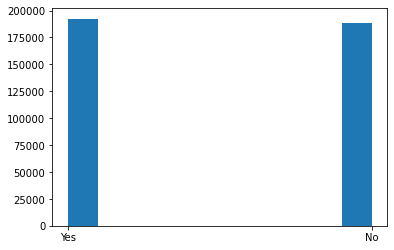

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


In [15]:
x=df['Vehicle_Damage']

plt.hist(x)
plt.show()

print(df['Vehicle_Damage'].value_counts())

In [16]:
## moving unrequired num data

In [17]:
X=df.drop(['id','Driving_License', 'Response'], axis=1)
y=df['Response']

X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=42)

In [18]:
X_train.shape

(266776, 9)

In [19]:
X_train.columns

Index(['Gender', 'Age', 'Region_Code', 'Previously_Insured', 'Vehicle_Age',
       'Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Vintage'],
      dtype='object')

In [20]:
cat_df=X_train[['Gender','Previously_Insured','Vehicle_Age','Vehicle_Damage']]

In [21]:
cat_df

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage
55914,Male,0,1-2 Year,Yes
179876,Male,0,> 2 Years,Yes
300095,Female,1,< 1 Year,No
60078,Male,1,1-2 Year,No
312426,Male,0,< 1 Year,Yes
...,...,...,...,...
259178,Female,1,< 1 Year,No
365838,Male,0,1-2 Year,Yes
131932,Female,0,< 1 Year,Yes
146867,Male,1,1-2 Year,Yes


In [22]:
label_encoder = preprocessing.LabelEncoder()
  
cat_df['Gender']= label_encoder.fit_transform(cat_df['Gender'])
cat_df['Vehicle_Age']= label_encoder.fit_transform(cat_df['Vehicle_Age'])
cat_df['Vehicle_Damage']= label_encoder.fit_transform(cat_df['Vehicle_Damage'])
cat_df


C:\Users\LZ575NE\AppData\Local\Temp\ipykernel_5240\2841505347.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Gender']= label_encoder.fit_transform(cat_df['Gender'])
C:\Users\LZ575NE\AppData\Local\Temp\ipykernel_5240\2841505347.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_df['Vehicle_Age']= label_encoder.fit_transform(cat_df['Vehicle_Age'])
C:\Users\LZ575NE\AppData\Local\Temp\ipykernel_5240\2841505347.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

,Gender,Previously_Insured,Vehicle_Age,Vehicle_Damage
55914,1,0,0,1
179876,1,0,2,1
300095,0,1,1,0
60078,1,1,0,0
312426,1,0,1,1
...,...,...,...,...
259178,0,1,1,0
365838,1,0,0,1
131932,0,0,1,1
146867,1,1,0,1


In [23]:
from sklearn.feature_selection import chi2
f_p_values=chi2(cat_df,y_train)
f_p_values

(array([  336.56686809, 16770.34502848,  1845.92380239, 16441.9362723 ]),
 array([3.56908311e-75, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00]))

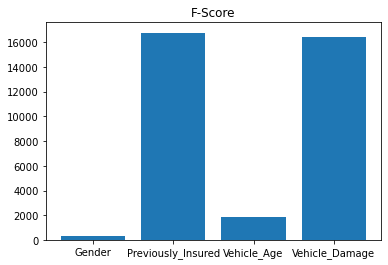

In [24]:
plt.bar(['Gender','Previously_Insured','Vehicle_Age','Vehicle_Damage'],f_p_values[0])
plt.title('F-Score')
plt.show()

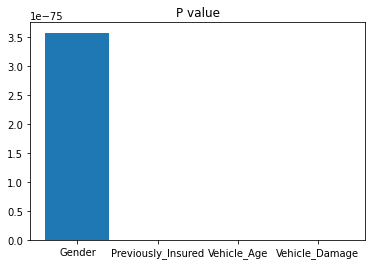

In [25]:
plt.bar(['Gender','Previously_Insured','Vehicle_Age','Vehicle_Damage'],f_p_values[1])
plt.title('P value')
plt.show()

In [26]:
cat_df=cat_df.drop(['Gender', 'Vehicle_Age'], axis=1)
cat_df

,Previously_Insured,Vehicle_Damage
55914,0,1
179876,0,1
300095,1,0
60078,1,0
312426,0,1
...,...,...
259178,1,0
365838,0,1
131932,0,1
146867,1,1


In [27]:
label_encoder = preprocessing.LabelEncoder()
  
df['Gender']= label_encoder.fit_transform(df['Gender'])
df['Vehicle_Age']= label_encoder.fit_transform(df['Vehicle_Age'])
df['Vehicle_Damage']= label_encoder.fit_transform(df['Vehicle_Damage'])
df


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,2,1,76,1,3,0,0,0,33536,26,183,0
2,3,1,47,1,28,0,2,1,38294,26,27,1
3,4,1,21,1,11,1,1,0,28619,152,203,0
4,5,0,29,1,41,1,1,0,27496,152,39,0
...,...,...,...,...,...,...,...,...,...,...,...,...
381104,381105,1,74,1,26,1,0,0,30170,26,88,0
381105,381106,1,30,1,37,1,1,0,40016,152,131,0
381106,381107,1,21,1,30,1,1,0,35118,160,161,0
381107,381108,0,68,1,14,0,2,1,44617,124,74,0


In [28]:
df.corr()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,1.000000,0.000999,0.001561,-0.000564,-0.000572,0.002457,-0.001345,-0.001507,0.003027,-0.002837,-0.000630,-0.001368
Gender,0.000999,1.000000,0.145545,-0.018374,0.000604,-0.081932,-0.112625,0.091606,0.003673,-0.111159,-0.002517,0.052440
Age,0.001561,0.145545,1.000000,-0.079782,0.042574,-0.254682,-0.522300,0.267534,0.067507,-0.577826,-0.001264,0.111147
Driving_License,-0.000564,-0.018374,-0.079782,1.000000,-0.001081,0.014969,0.030173,-0.016622,-0.011906,0.043731,-0.000848,0.010155
Region_Code,-0.000572,0.000604,0.042574,-0.001081,1.000000,-0.024659,-0.027840,0.028235,-0.010588,-0.042420,-0.002750,0.010570
Previously_Insured,0.002457,-0.081932,-0.254682,0.014969,-0.024659,1.000000,0.174783,-0.824143,0.004269,0.219381,0.002537,-0.341170
Vehicle_Age,-0.001345,-0.112625,-0.522300,0.030173,-0.027840,0.174783,1.000000,-0.174238,0.023656,0.388551,0.002484,-0.104078
Vehicle_Damage,-0.001507,0.091606,0.267534,-0.016622,0.028235,-0.824143,-0.174238,1.000000,0.009349,-0.224377,-0.002064,0.354400
Annual_Premium,0.003027,0.003673,0.067507,-0.011906,-0.010588,0.004269,0.023656,0.009349,1.000000,-0.113247,-0.000608,0.022575
Policy_Sales_Channel,-0.002837,-0.111159,-0.577826,0.043731,-0.042420,0.219381,0.388551,-0.224377,-0.113247,1.000000,0.000002,-0.139042


In [29]:
abs(df.corr()['Response']).sort_values(ascending=False)

Response                1.000000
Vehicle_Damage          0.354400
Previously_Insured      0.341170
Policy_Sales_Channel    0.139042
Age                     0.111147
Vehicle_Age             0.104078
Gender                  0.052440
Annual_Premium          0.022575
Region_Code             0.010570
Driving_License         0.010155
id                      0.001368
Vintage                 0.001050
Name: Response, dtype: float64

<AxesSubplot:>

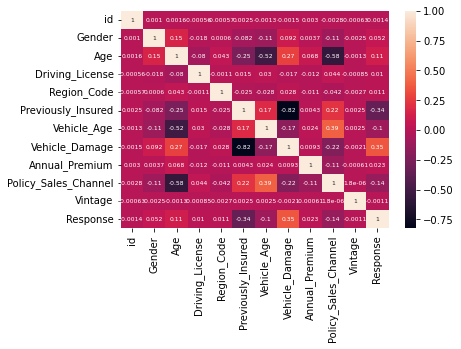

In [30]:
import seaborn as sns
sns.heatmap(df.corr(), annot=True, annot_kws={"size":6})

In [33]:
cat_df=cat_df.drop(['Gender','Region_Code' , 'Vintage ', ' Policy_Sales_Channel ','Vehicle_Age'], axis=1)
cat_df

KeyError: "['Gender', 'Region_Code', 'Vintage ', ' Policy_Sales_Channel ', 'Vehicle_Age'] not found in axis"

In [ ]:
# Data Modelling

In [40]:
from sklearn.model_selection import RandomizedSearchCV

In [41]:
X_train.dtypes

Gender                  object
Age                      int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
dtype: object

In [43]:
random_search = {'criterion': ['entropy', 'gini'],
               'max_depth': [2,3,4,5,6,7,10],
               'min_samples_leaf': [4, 6, 8],
               'min_samples_split': [5, 7,10],
               'n_estimators': [300]}

clf = RandomForestClassifier()
model = RandomizedSearchCV(estimator = clf, param_distributions = random_search, n_iter = 10, 
                               cv = 4, verbose= 1, random_state= 101, n_jobs = -1)
model.fit(X_train,y_train)

Fitting 4 folds for each of 10 candidates, totalling 40 fits


C:\Users\LZ575NE\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\LZ575NE\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\LZ575NE\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 327, in fit
    X, y = self._validate_data(
  File "C:\Users\LZ575NE\Anaconda3\lib\site-packages\sklearn\base.py", line 581, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\LZ575NE\Anacond

ValueError: could not convert string to float: 'Male'